# Failures resulting from Static Loading

<b>Failure</b> can mean a part has separated into two or more pieces; has become permanently distorted, thus ruining its geometry; has had its reliability downgraded; or has had its function compromised, whatever the reason. Events such as distortion, permanent set, cracking, and rupturing are among the ways that a machine element fails. 

So, if the failure mechanism is simple, then simple tests can give clues. What is simple here by the way? The tension test is uniaxial (that’s simple) and elongations are largest in the axial direction, so strains can be measured and stresses inferred up to “failure.” Just what is important: a critical stress, a critical strain, a critical energy? Let's look for a theory.

Unfortunately, there is no universal theory of failure for the general case of material properties and stress state. Instead, over the years several hypotheses have been formulated and tested, leading to today’s accepted practices. Being accepted, we can characterize these “practices” as theories as most designers do. 

Structural metal behavior is typically classified as being <b>"Ductile"</b> or <b>"Brittle"</b> (although under special situations, a material normally considered ductile can fail in a brittle manner). 

<b>Ductile materials</b> are normally classified such that ef >= 0.05 (where "ef" = fracture strain) and have an identifiable yield strength that is often the same in compression as in tension (Syt = Syc = Sy). 

<b>Brittle materials</b>, ef < 0.05 , do not exhibit an identifiable yield strength, and are typically classified by ultimate tensile and compressive strengths, Sut and Suc, respectively (where Suc is given as a positive quantity). 

The generally accepted theories are:

    Ductile materials (yield criteria)
        • Maximum shear stress (MSS)
        • Distortion energy (DE)
        • Ductile Coulomb-Mohr (DCM)

    Brittle materials (fracture criteria)
        • Maximum normal stress (MNS)
        • Brittle Coulomb-Mohr (BCM)
        • Modified Mohr (MM)

# Failure Theory Algorithm

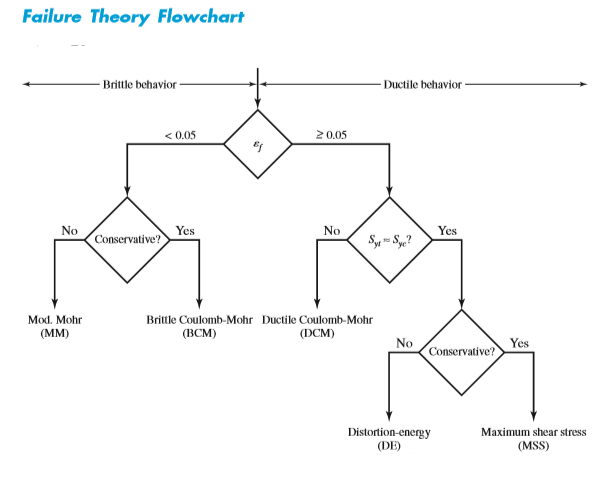

# Python Code

Here runs the Python code based on the above application of Failure Theory on "Failures resulting from Static Loading".

In [10]:
#Importing required Libraries

import math
import matplotlib.pyplot as plt
import numpy as np

######

<b>Maximum Shear Stress(MSS) Theory</b>

The maximum-shear-stress (MSS) theory predicts that yielding begins whenever the maximum shear stress in any element equals or exceeds the maximum shear stress in a tension-test specimen of the same material when that specimen begins to yield. The MSS theory is also referred to as the Tresca or Guest theory.

The following 3 cases are to be considered as per MSS Theory:

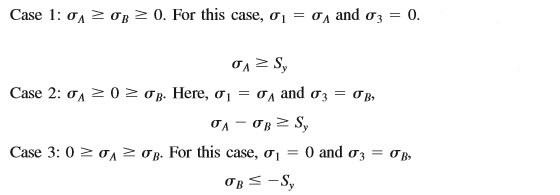

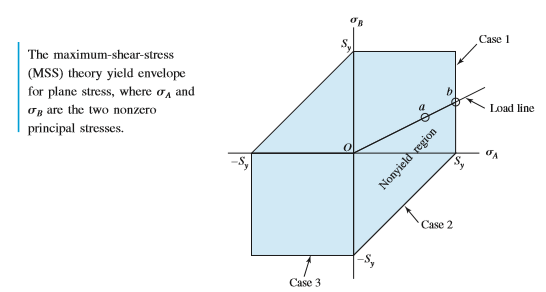

In [11]:
#Function for Maximum Shear Stress(MSS) Theory

def mss(sigma_xx,sigma_yy,tau_xy,Syt):
    
    print('\nAnalysis according to MSS Theory:')
    
    #Calculating Principal Stresses
    sigma_A = ((sigma_xx+sigma_yy)/2) + math.sqrt((((sigma_xx-sigma_yy)/2)**2)+tau_xy**2)
    sigma_B = ((sigma_xx+sigma_yy)/2) - math.sqrt((((sigma_xx-sigma_yy)/2)**2)+tau_xy**2)
    
    #Ordering Stresses (Decreasing Order)
    stress = sorted([sigma_A,sigma_B,0])[::-1]
    
    sigma_1 = stress[0]
    sigma_2 = stress[1]
    sigma_3 = stress[2]
    
    #Maximum Shear Stress
    Tau_max = (sigma_1-sigma_3)/2
    print('Maximum Shear Stress:',Tau_max,'MPa')
    
    #Factor of Safety
    if(Tau_max != 0):
        n = Syt/(2*Tau_max)
        print('Factor of Safety based on MSS Theory is',n)
        print()
    else:
        print('Factor of Safety based on MSS Theory is infinity')
        print()
        
    
    #Plotting
    
    #X & Y limits
    x = np.linspace(-Syt-100,Syt+100,50)
    y = np.linspace(-Syt-100,Syt+100,50)
    
    S_yt = np.array([Syt for i in range(int(len(y)/2))])
    
    #X and Y axes
    x0 = np.array([0 for i in range(len(x))])
    y0 = np.array([0 for i in range(len(y))])
    plt.plot(x0,y,'black',label='x & y - axes')
    plt.plot(x,y0,'black')
    
    plt.xlim([-Syt-100,Syt+100])
    plt.ylim([-Syt-100,Syt+100])
    plt.xlabel('sigma_A')
    plt.ylabel('sigma_B')
    
    #Quadrant-1
    plt.plot(S_yt,np.linspace(0,Syt,int(len(y)/2)),'-b')
    plt.plot(0,Syt,'bo',label='Sy (Yield Strength)')
    plt.plot(np.linspace(0,Syt,int(len(x)/2)),S_yt,'-b')
    plt.plot(Syt,0,'bo')
    plt.fill_between(np.linspace(0,Syt,len(x)),y0,np.array([Syt for i in range(len(y))]),
                     where=(y0 < np.array([Syt for i in range(len(y))])),interpolate=True,color='C0',alpha='0.2')


    #Quadrant-2
    Sigma_1_Q2 = np.linspace(-Syt,0,int(len(x)/2))
    Sigma_3_Q2 = np.linspace(0,Syt,int(len(y)/2))
    plt.plot(Sigma_1_Q2,Sigma_3_Q2,'-b')
    plt.fill_between(np.linspace(-Syt,0,len(x)),y0,np.linspace(0,Syt,len(y)),
                     where=(y0 < np.linspace(0,Syt,len(y))),interpolate=True,color='C0',alpha='0.2')

    #Quadrant-3
    plt.plot(-S_yt,np.linspace(-Syt,0,int(len(y)/2)),'-b')
    plt.plot(-Syt,0,'bo')
    plt.plot(np.linspace(-Syt,0,int(len(x)/2)),-S_yt,'-b')
    plt.plot(0,-Syt,'bo')
    plt.fill_between(np.linspace(-Syt,0,len(x)),y0,np.array([-Syt for i in range(len(y))]),
                     where=(y0 > np.array([-Syt for i in range(len(y))])),interpolate=True,color='C0',alpha='0.2')

    #Quadrant-4
    Sigma_1_Q4 = np.linspace(0,Syt,int(len(x)/2))
    Sigma_3_Q4 = np.linspace(-Syt,0,int(len(y)/2))
    plt.plot(Sigma_1_Q4,Sigma_3_Q4,'-b')
    plt.fill_between(np.linspace(0,Syt,len(x)),y0,np.linspace(-Syt,0,len(y)),
                     where=(y0 > np.linspace(-Syt,0,len(y))),interpolate=True,color='C0',alpha='0.2')
    
    #Load Line
    Og = [0,0] #Origin
    P = [sigma_A,sigma_B]
    plt.plot(P[0],P[1],'ro',label='(sigma_A,sigma_B)') #Acting Load Point
    plt.plot([Og[0],P[0]],[Og[1],P[1]],'--r',label='Load Line')
    
    plt.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left')
    plt.title('MSS Theory - Envelope :::: DE Theory - Rotated Ellipse')

######

<b>Distortion Energy(DE) Theory</b>

The distortion-energy theory predicts that yielding occurs when the distortion strain energy per unit volume reaches or exceeds the distortion strain energy per unit volume for yield in simple tension or compression of the same material.

The theory goes as follows:

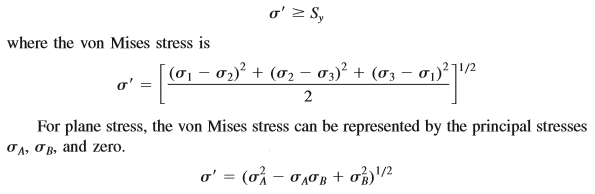

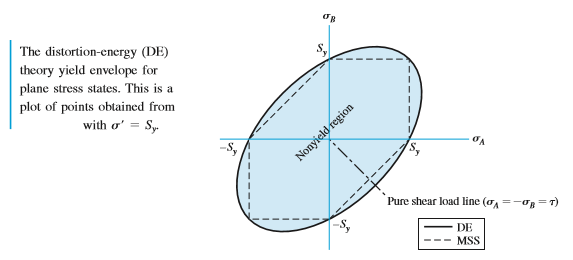

In [12]:
#Function for Distortion Energy(DE) Theory

def de(sigma_xx,sigma_yy,tau_xy,Syt):
    
    print('\nAnalysis according to DE Theory:')
    
    #Calculating Principal Stresses
    sigma_A = ((sigma_xx+sigma_yy)/2) + math.sqrt((((sigma_xx-sigma_yy)/2)**2)+tau_xy**2)
    sigma_B = ((sigma_xx+sigma_yy)/2) - math.sqrt((((sigma_xx-sigma_yy)/2)**2)+tau_xy**2)
    
    #Stress Calculation
    sigma_prime = math.sqrt(sigma_xx**2 + sigma_yy**2 - sigma_xx*sigma_yy + 3*(tau_xy**2))
    print('Von Mises Stress:',sigma_prime,'MPa')
    
    #Factor of Safety
    if(sigma_prime != 0):
        n = Syt/sigma_prime
        print('Factor of Safety based on DE Theory is',n)
        print()
    else:
        print('Factor of Safety based on DE Theory is infinity')
        print()
        
    #Plotting
    
    #X & Y limits
    x = np.linspace(-Syt-100,Syt+100,50)
    y = np.linspace(-Syt-100,Syt+100,50)
    
    #X and Y axes
    x0 = np.array([0 for i in range(len(x))])
    y0 = np.array([0 for i in range(len(y))])
    plt.plot(x0,y,'black')
    plt.plot(x,y0,'black')

    plt.xlim([-Syt-100,Syt+100])
    plt.ylim([-Syt-100,Syt+100])
    plt.xlabel('sigma_A')
    plt.ylabel('sigma_B')

    Sigma_A = np.linspace(-Syt-100,Syt+100,50)
    Sigma_B = np.linspace(-Syt-100,Syt+100,50)

    Sigma_A,Sigma_B = np.meshgrid(Sigma_A,Sigma_B)

    LHS = (Sigma_A**2 - Sigma_A*Sigma_B + Sigma_B**2)
    RHS = Syt**2
    plt.contour(Sigma_A,Sigma_B,LHS-RHS,[0])

######

<b>Ductile Coulumb Mohr(DCM) Theory</b>

The DCM Theory is also referred to as the Internal Friction Theory. The theory is similar to that of MSS except that this theory takes into consideration that not all materials have compressive strengths equal to their corresponding tensile values.

The following 3 cases are considered as per this theory:

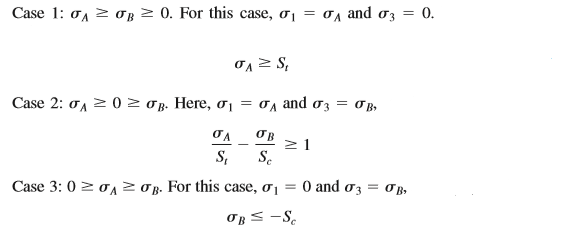

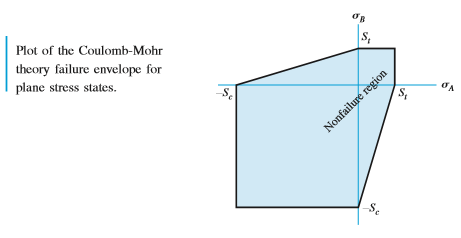

In [13]:
#Function for Ductile Coulumb Mohr(DCM) Theory

def dcm(sigma_xx,sigma_yy,tau_xy,Syt,Syc):
    
    print('\nAnalysis according to DCM Theory:')
    
    #Torsional Yield Stress
    Ssy = Syt*Syc/(Syt+Syc)
    print('Torsional Yield Stress:',Ssy,'MPa')
    
    #Calculating Principal Stresses
    sigma_A = ((sigma_xx+sigma_yy)/2) + math.sqrt((((sigma_xx-sigma_yy)/2)**2)+tau_xy**2)
    sigma_B = ((sigma_xx+sigma_yy)/2) - math.sqrt((((sigma_xx-sigma_yy)/2)**2)+tau_xy**2)
    
    #Ordering Stresses (Decreasing Order)
    stress = sorted([sigma_A,sigma_B,0])[::-1]
    
    sigma_1 = stress[0]
    sigma_2 = stress[1]
    sigma_3 = stress[2]
    
    stress = ((sigma_1/Syt)-(sigma_3/Syc)) #LHS side of Design Equation according to DCM Theory
    
    if(stress != 0):
        n = 1/stress
        print('Factor of Safety based on DCM Theory is',n)
        print()
    else:
        print('Factor of Safety based on DCM Theory is infinity')
        print()
        
    #Plotting
    
    #X & Y limits
    x = np.linspace(-Syc-100,Syt+100,50)
    y = np.linspace(-Syc-100,Syt+100,50)
    
    S_yt = np.array([Syt for i in range(int(len(y)/2))])
    S_yc = np.array([Syc for i in range(int(len(y)/2))])
    
    #X and Y axes
    x0 = np.array([0 for i in range(len(x))])
    y0 = np.array([0 for i in range(len(y))])
    plt.plot(x0,y,'black',label='x & y - axes')
    plt.plot(x,y0,'black')
    
    plt.xlim([-Syc-100,Syt+100])
    plt.ylim([-Syc-100,Syt+100])
    plt.xlabel('sigma_A')
    plt.ylabel('sigma_B')
    
    #Quadrant-1
    plt.plot(S_yt,np.linspace(0,Syt,int(len(y)/2)),'-r')
    plt.plot(0,Syt,'bo',label='Syt (Tensile Yield Strength)')
    plt.plot(np.linspace(0,Syt,int(len(x)/2)),S_yt,'-r')
    plt.plot(Syt,0,'bo')
    plt.fill_between(np.linspace(0,Syt,len(x)),y0,np.array([Syt for i in range(len(y))]),
                     where=(y0 < np.array([Syt for i in range(len(y))])),interpolate=True,color='C1',alpha='0.2')


    #Quadrant-2
    Sigma_1_Q2 = np.linspace(-Syc,0,int(len(x)/2))
    Sigma_3_Q2 = np.linspace(0,Syt,int(len(y)/2))
    plt.plot(Sigma_1_Q2,Sigma_3_Q2,'-r')
    plt.fill_between(np.linspace(-Syc,0,len(x)),y0,np.linspace(0,Syt,len(y)),
                     where=(y0 < np.linspace(0,Syt,len(y))),interpolate=True,color='C1',alpha='0.2')

    #Quadrant-3
    plt.plot(-S_yc,np.linspace(-Syc,0,int(len(y)/2)),'-r')
    plt.plot(-Syc,0,'go',label='-Syc (Compressive Yield Strength)')
    plt.plot(np.linspace(-Syc,0,int(len(x)/2)),-S_yc,'-r')
    plt.plot(0,-Syc,'go')
    plt.fill_between(np.linspace(-Syc,0,len(x)),y0,np.array([-Syc for i in range(len(y))]),
                     where=(y0 > np.array([-Syc for i in range(len(y))])),interpolate=True,color='C1',alpha='0.2')

    #Quadrant-4
    Sigma_1_Q4 = np.linspace(0,Syt,int(len(x)/2))
    Sigma_3_Q4 = np.linspace(-Syc,0,int(len(y)/2))
    plt.plot(Sigma_1_Q4,Sigma_3_Q4,'-r')
    plt.fill_between(np.linspace(0,Syt,len(x)),y0,np.linspace(-Syc,0,len(y)),
                     where=(y0 > np.linspace(-Syc,0,len(y))),interpolate=True,color='C1',alpha='0.2')
    
    #Load Line
    Og = [0,0] #Origin
    P = [sigma_A,sigma_B]
    plt.plot(P[0],P[1],'ro',label='(sigma_A,sigma_B)') #Acting Load Point
    plt.plot([Og[0],P[0]],[Og[1],P[1]],'--r',label='Load Line')
    
    plt.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left')
    plt.title('Ductile Coulumb Mohr(DCM) Theory')

######

<b>Maximum Normal Stress(MNS) Theory</b>

The maximum-normal-stress (MNS) theory states that failure occurs whenever one of the three principal stresses equals or exceeds the strength.

This is given as follows:

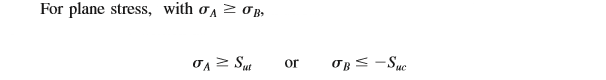

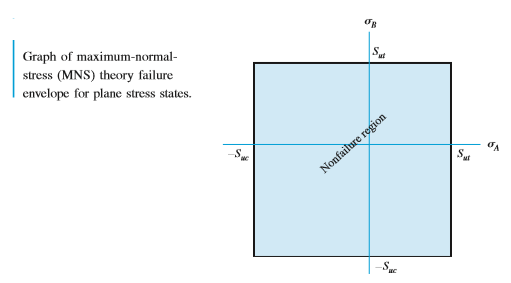

In [14]:
#Function for Maximum Normal Stress(MNS) Theory

def mns(sigma_xx,sigma_yy,tau_xy,Sut,Suc):
    
    #Calculating Principal Stresses
    sigma_A = ((sigma_xx+sigma_yy)/2) + math.sqrt((((sigma_xx-sigma_yy)/2)**2)+tau_xy**2)
    sigma_B = ((sigma_xx+sigma_yy)/2) - math.sqrt((((sigma_xx-sigma_yy)/2)**2)+tau_xy**2)
    
    #X & Y limits
    x = np.linspace(-Suc-100,Sut+100,50)
    y = np.linspace(-Suc-100,Sut+100,50)
    
    S_ut = np.array([Sut for i in range(int(len(y)/2))])
    S_uc = np.array([Suc for i in range(int(len(y)/2))])
    
    #X and Y axes
    x0 = np.array([0 for i in range(len(x))])
    y0 = np.array([0 for i in range(len(y))])
    plt.plot(x0,y,'black',label='x & y - axes')
    plt.plot(x,y0,'black')
    
    plt.xlim([-Suc-100,Sut+100])
    plt.ylim([-Suc-100,Sut+100])
    plt.xlabel('sigma_A')
    plt.ylabel('sigma_B')
    
    #Quadrant-1
    plt.plot(S_ut,np.linspace(0,Sut,int(len(y)/2)),'-r',label='MNS Theory')
    plt.plot(0,Sut,'bo',label='Sut (Ultimate Tensile Strength)')
    plt.plot(np.linspace(0,Sut,int(len(x)/2)),S_ut,'-r')
    plt.plot(Sut,0,'bo')
    plt.fill_between(np.linspace(0,Sut,len(x)),y0,np.array([Sut for i in range(len(y))]),
                     where=(y0 < np.array([Sut for i in range(len(y))])),interpolate=True,color='C1',alpha='0.2')


    #Quadrant-2
    plt.plot(-S_uc,np.linspace(0,Sut,int(len(y)/2)),'-r')
    plt.plot(-Suc,0,'go',label='-Suc (Ultimate Compressive Strength)')
    plt.plot(np.linspace(-Suc,0,int(len(x)/2)),S_ut,'-r')
    plt.fill_between(np.linspace(-Suc,0,len(x)),y0,np.array([Sut for i in range(len(y))]),
                     where=(y0 < np.array([Sut for i in range(len(y))])),interpolate=True,color='C1',alpha='0.2')

    #Quadrant-3
    plt.plot(-S_uc,np.linspace(-Suc,0,int(len(y)/2)),'-r')
    plt.plot(0,-Suc,'go')
    plt.plot(np.linspace(-Suc,0,int(len(x)/2)),-S_uc,'-r')
    plt.fill_between(np.linspace(-Suc,0,len(x)),y0,np.array([-Suc for i in range(len(y))]),
                     where=(y0 > np.array([-Suc for i in range(len(y))])),interpolate=True,color='C1',alpha='0.2')
    
    #Quadrant-4
    plt.plot(S_ut,np.linspace(-Suc,0,int(len(y)/2)),'-r')
    plt.plot(np.linspace(0,Sut,int(len(x)/2)),-S_uc,'-r')
    plt.fill_between(np.linspace(0,Sut,len(x)),y0,np.array([-Suc for i in range(len(y))]),
                     where=(y0 > np.array([-Suc for i in range(len(y))])),interpolate=True,color='C1',alpha='0.2')

######

<b>Brittle Coulumb Mohr(BCM) Theory</b>

The BCM theory is basically a modification of Mohr's theory and is given in the following cases:

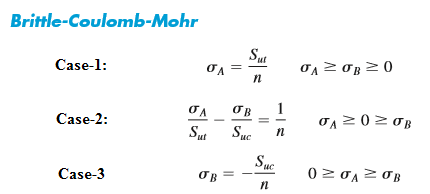

In [15]:
#Function for Brittle Coulumb Mohr(BCM) Theory

def bcm(sigma_xx,sigma_yy,tau_xy,Sut,Suc):
    
    print('\nAnalysis according to BCM Theory:')
    
    #Calculating Principal Stresses
    sigma_A = ((sigma_xx+sigma_yy)/2) + math.sqrt((((sigma_xx-sigma_yy)/2)**2)+tau_xy**2)
    sigma_B = ((sigma_xx+sigma_yy)/2) - math.sqrt((((sigma_xx-sigma_yy)/2)**2)+tau_xy**2)
    
    #Ordering Stresses (Decreasing Order)
    stress = sorted([sigma_A,sigma_B,0])[::-1]
    
    sigma_1 = stress[0]
    sigma_2 = stress[1]
    sigma_3 = stress[2]
    
    stress = ((sigma_1/Sut)-(sigma_3/Suc)) #LHS side of Design Equation according to BCM Theory
    
    if(stress != 0):
        n = 1/stress
        print('Factor of Safety based on BCM Theory is',n)
        print()
    else:
        print('Factor of Safety based on BCM Theory is infinity')
        print()
        
    #Plotting
    
    #X & Y limits
    x = np.linspace(-Suc-100,Sut+100,50)
    y = np.linspace(-Suc-100,Sut+100,50)
    
    S_ut = np.array([Sut for i in range(int(len(y)/2))])
    S_uc = np.array([Suc for i in range(int(len(y)/2))])
    
    #X and Y axes
    x0 = np.array([0 for i in range(len(x))])
    y0 = np.array([0 for i in range(len(y))])
    plt.plot(x0,y,'black')
    plt.plot(x,y0,'black')
    
    plt.xlim([-Suc-100,Sut+100])
    plt.ylim([-Suc-100,Sut+100])
    plt.xlabel('sigma_A')
    plt.ylabel('sigma_B')
    
    #Quadrant-1 same as the one from MNS Theory

    #Quadrant-2
    Sigma_1_Q2 = np.linspace(-Suc,0,int(len(x)/2))
    Sigma_3_Q2 = np.linspace(0,Sut,int(len(y)/2))
    plt.plot(Sigma_1_Q2,Sigma_3_Q2,'-b',label='BCM Theory')

    #Quadrant-3 same as the one from MNS Theory

    #Quadrant-4
    Sigma_1_Q4 = np.linspace(0,Sut,int(len(x)/2))
    Sigma_3_Q4 = np.linspace(-Suc,0,int(len(y)/2))
    plt.plot(Sigma_1_Q4,Sigma_3_Q4,'-b')
    
    #Load Line
    Og = [0,0] #Origin
    P = [sigma_A,sigma_B]
    plt.plot(P[0],P[1],'ro',label='(sigma_A,sigma_B)') #Acting Load Point
    plt.plot([Og[0],P[0]],[Og[1],P[1]],'--r',label='Load Line')

######

<b>Modified Mohr(MM) Theory</b>

The MM theory is another modification of Mohr's theory and is given by the following 3 cases:

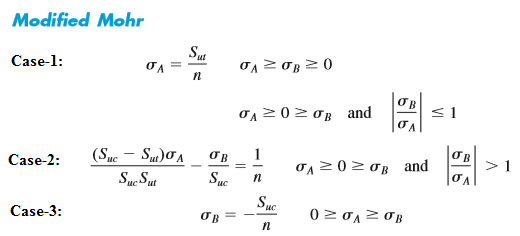

In [16]:
#Function for Modified Mohr(MM) Theory

def mm(sigma_xx,sigma_yy,tau_xy,Sut,Suc):
    
    print('\nAnalysis according to MM Theory:')
    
    #Calculating Principal Stresses
    sigma_A = ((sigma_xx+sigma_yy)/2) + math.sqrt((((sigma_xx-sigma_yy)/2)**2)+tau_xy**2)
    sigma_B = ((sigma_xx+sigma_yy)/2) - math.sqrt((((sigma_xx-sigma_yy)/2)**2)+tau_xy**2)
    
    #Ordering Stresses (Decreasing Order)
    stress = sorted([sigma_A,sigma_B,0])[::-1]
    
    sigma_1 = stress[0]
    sigma_2 = stress[1]
    sigma_3 = stress[2]
    
    #4-cases for Factor of Safety
    if(sigma_3 == 0):
        if(sigma_1 != 0):
            n = Sut/sigma_1
            print('Factor of safety based on MM theory is',n)
            print()
        else:
            print('Factor of safety based on MM theory is infinity')
            print()
    elif(sigma_3 <= 0 and abs(sigma_3/sigma_1) <= 1):
        if(sigma_1 != 0):
            n = Sut/sigma_1
            print('Factor of safety based on MM theory is',n)
            print()
        else:
            print('Factor of safety based on MM theory is infinity')
            print()
    elif(sigma_3 <= 0 and abs(sigma_3/sigma_1) > 1):
        relation = (((Suc-Sut)/(Suc*Sut))*sigma_1 - (sigma_3/Suc)) #Design relation from MM Theory
        if(relation != 0):
            n = 1/relation
            print('Factor of safety based on MM theory is',n)
            print()
        else:
            print('Factor of safety based on MM theory is infinity')
            print()
    elif(sigma_1 == 0):
        if(sigma_3 != 0):
            n = -Suc/sigma_c
            print('Factor of safety based on MM theory is',n)
            print()
        else:
            print('Factor of safety based on MM theory is -infinity')
            print()
            
    #Plotting
    
    #X & Y limits
    x = np.linspace(-Suc-100,Sut+100,50)
    y = np.linspace(-Suc-100,Sut+100,50)
    
    S_ut = np.array([Sut for i in range(int(len(y)/2))])
    S_uc = np.array([Suc for i in range(int(len(y)/2))])
    
    #X and Y axes
    x0 = np.array([0 for i in range(len(x))])
    y0 = np.array([0 for i in range(len(y))])
    plt.plot(x0,y,'black')
    plt.plot(x,y0,'black')
    
    plt.xlim([-Suc-100,Sut+100])
    plt.ylim([-Suc-100,Sut+100])
    plt.xlabel('sigma_A')
    plt.ylabel('sigma_B')
    
    #Quadrant-1 same as the one from MNS Theory

    #Quadrant-2
    Sigma_1_Q2 = np.linspace(-Suc,-Sut,int(len(x)/2))
    Sigma_3_Q2 = np.linspace(0,Sut,int(len(y)/2))
    plt.plot(Sigma_1_Q2,Sigma_3_Q2,'-y',label='MM Theory')

    #Quadrant-3 same as the one from MNS Theory

    #Quadrant-4
    Sigma_1_Q4 = np.linspace(0,Sut,int(len(x)/2))
    Sigma_3_Q4 = np.linspace(-Suc,-Sut,int(len(y)/2))
    plt.plot(Sigma_1_Q4,Sigma_3_Q4,'-y')
    
    plt.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left')
    plt.title('MNS :: BCM :: MM Theories')

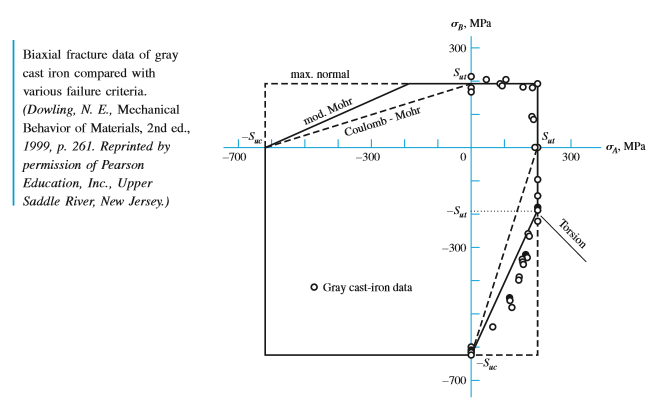

# Running Program

In [17]:
def failure_theory():
    print('Failure-Theory',end='\n')
    print('Failures resulting from Static Loading',end='\n')
    epsilon_f = float(input('Enter Fracture Strain value of the material>')) #Fracture strain
    if(epsilon_f<0.05):

        #Brittle
        print('Since',epsilon_f,'< 0.05, the material shows Brittle behavior.')
        print()
        print('Enter Stress values below in MPa to analyze further the failure of the material.')

        #Taking input of Stress values
        sigma_xx = float(input('Enter Normal Stress along x-direction ("sigma_xx") in MPa >'))
        sigma_yy = float(input('Enter Normal Stress along y-direction ("sigma_yy") in Mpa >'))
        tau_xy = float(input('Enter Shear Stress shearing along xy-direction ("tau_xy") in Mpa >'))
        print()

        #Taking input of Ultimate strength values
        Sut = float(input('Enter Ultimate Tensile Strength of the material in MPa >'))
        Suc = float(input('Enter Ultimate Compressive Strength of the material in MPa >'))
        print()

        #Maximum Normal Stress Theory
        mns(sigma_xx,sigma_yy,tau_xy,Sut,Suc)

        #Two Paths - Conservative: Brittle Coulumb Mohr(BCM) theory & Non-Conserative: Modified Mohr(MM) theory

        #Conservative: BCM theory
        bcm(sigma_xx,sigma_yy,tau_xy,Sut,Suc)

        #Non-Conservative: MM theory
        mm(sigma_xx,sigma_yy,tau_xy,Sut,Suc)

        #End of Brittle Behavior

    else:

        #Ductile
        print('Since',epsilon_f,' >= 0.05, the material shows Ductile behavior.')
        print()
        print('Enter Stress values below in MPa to analyze further the failure of the material.')
        print()

        #Taking input of Stress values
        sigma_xx = float(input('Enter Normal Stress along x-direction ("sigma_xx") in Mpa >'))
        sigma_yy = float(input('Enter Normal Stress along y-direction ("sigma_yy") in Mpa >'))
        tau_xy = float(input('Enter Shear Stress shearing along xy-direction ("tau_xy") in MPa >'))
        print()

        #Taking input of Yield strength values
        Syt = float(input('Enter Tensile Yield Strength of the material in MPa >'))
        Syc = float(input('Enter Compressive Yield Strength of the material in MPa >'))
        print()

        #Two Paths - Path-1(if Syt == Syc) & Path-2(if Syt != Syc)

        #Path-1
        if(Syt == Syc):

            #Two Paths - Conservative: Maximum Shear Stress(MSS) theory & Non-Conserative: Distortion Energy(DE) theory

            #Conservative: MSS theory
            mss(sigma_xx,sigma_yy,tau_xy,Syt)

            #Non-Conservative: DE theory
            de(sigma_xx,sigma_yy,tau_xy,Syt)

        #Path-2
        else:

            #Ductile Coulumb Mohr(DCM) theory
            dcm(sigma_xx,sigma_yy,tau_xy,Syt,Syc)

            #End of Ductile Behavior

######

<b>Considering an example with the following states of stress:</b>

sigma_xx = 70 MPa
sigma_yy = 70 MPa
tau_xy = 0 MPa

> For MSS & DE: Syt = Syc = 100 MPa; epsilon_f = 0.55

> For DCM: Syt = 200 MPa; Syc = 300 MPa; epsilon_f = 0.55

> For MNS, BCM & MM: Sut = 200 MPa; Suc = 700 MPa; epsilon_f = 0.045

Failure-Theory
Failures resulting from Static Loading
Enter Fracture Strain value of the material>0.55
Since 0.55  >= 0.05, the material shows Ductile behavior.

Enter Stress values below in MPa to analyze further the failure of the material.

Enter Normal Stress along x-direction ("sigma_xx") in Mpa >70
Enter Normal Stress along y-direction ("sigma_yy") in Mpa >70
Enter Shear Stress shearing along xy-direction ("tau_xy") in MPa >0

Enter Tensile Yield Strength of the material in MPa >100
Enter Compressive Yield Strength of the material in MPa >100


Analysis according to MSS Theory:
Maximum Shear Stress: 35.0 MPa
Factor of Safety based on MSS Theory is 1.4285714285714286


Analysis according to DE Theory:
Von Mises Stress: 70.0 MPa
Factor of Safety based on DE Theory is 1.4285714285714286



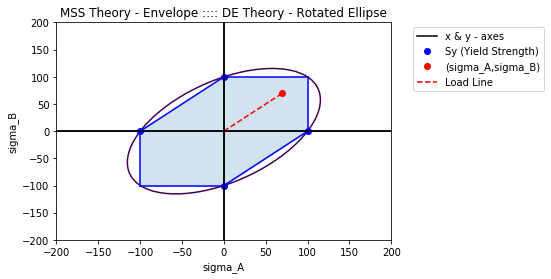

In [19]:
#MSS & DE
failure_theory()

Failure-Theory
Failures resulting from Static Loading
Enter Fracture Strain value of the material>0.55
Since 0.55  >= 0.05, the material shows Ductile behavior.

Enter Stress values below in MPa to analyze further the failure of the material.

Enter Normal Stress along x-direction ("sigma_xx") in Mpa >70
Enter Normal Stress along y-direction ("sigma_yy") in Mpa >70
Enter Shear Stress shearing along xy-direction ("tau_xy") in MPa >0

Enter Tensile Yield Strength of the material in MPa >200
Enter Compressive Yield Strength of the material in MPa >300


Analysis according to DCM Theory:
Torsional Yield Stress: 120.0 MPa
Factor of Safety based on DCM Theory is 2.857142857142857



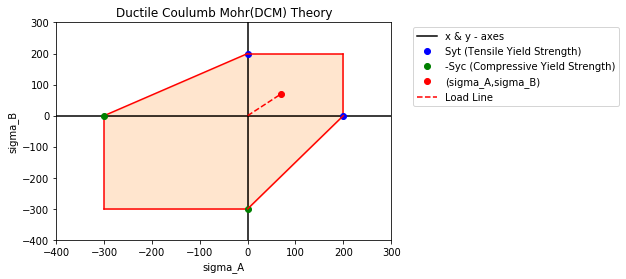

In [20]:
#DCM
failure_theory()

Failure-Theory
Failures resulting from Static Loading
Enter Fracture Strain value of the material>0.045
Since 0.045 < 0.05, the material shows Brittle behavior.

Enter Stress values below in MPa to analyze further the failure of the material.
Enter Normal Stress along x-direction ("sigma_xx") in MPa >70
Enter Normal Stress along y-direction ("sigma_yy") in Mpa >70
Enter Shear Stress shearing along xy-direction ("tau_xy") in Mpa >0

Enter Ultimate Tensile Strength of the material in MPa >200
Enter Ultimate Compressive Strength of the material in MPa >700


Analysis according to BCM Theory:
Factor of Safety based on BCM Theory is 2.857142857142857


Analysis according to MM Theory:
Factor of safety based on MM theory is 2.857142857142857



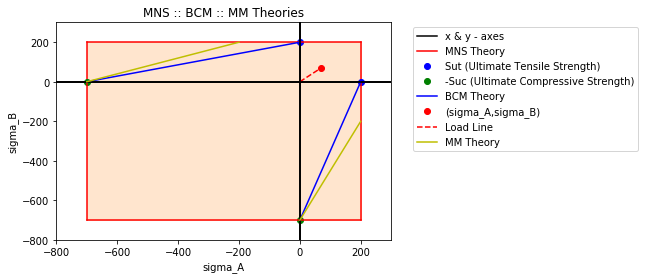

In [21]:
#MNS, BCM & MM
failure_theory()

######

<b>References</b>

1. Budynas G. Richard, Nisbett J. Keith, <i>"Shigley's Mechanical Engineering Design"</i>, 10th Edition.